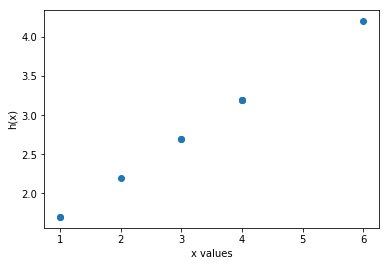

In [24]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,1,2,3,4,3,4,6,4])
def hx(x, t0,t1):
    return t0+t1*x
t0=1.2
t1=0.5
y = []
for i in x:
    y.append(hx(i,t0,t1))
plt.scatter(x,y)
plt.xlabel("x values")
plt.ylabel("h(x)")
plt.show()

In [25]:
#Question 2
A = np.array([1,1,2,3,4,3,4,6,4])
B = np.array([2,1,0.5,1,3,3,2,5,4])
print(np.dot(A,B))

82.0


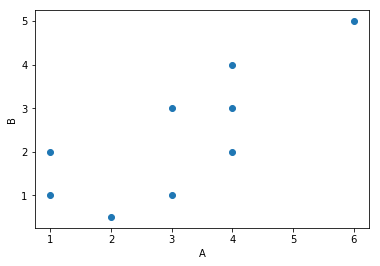

In [26]:
#Question 3
plt.scatter(A,B)
plt.xlabel("A")
plt.ylabel("B")
plt.show()

In [27]:
#Question 4
err = 0
for i in range(len(A)):
    err = err+ np.power(A[i]-B[i],2)
mse = err/len(A)
print(mse)

1.4722222222222223


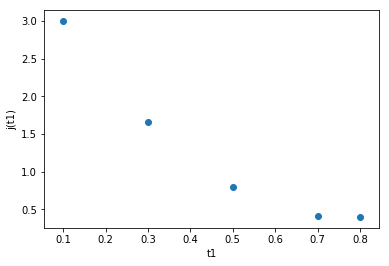

In [28]:
#Question 5
def compute_cost_function(n,t1,A,B):
    return (np.square(np.dot(A,t1)-B).sum())/(2*n)
t1_values = [0.1, 0.3, 0.5, 0.7, 0.8]
j = []
for t1 in t1_values:
    j.append(compute_cost_function(len(A), t1, A,B))
plt.scatter(t1_values, j)
plt.xlabel("t1")
plt.ylabel("j(t1)")
plt.show()

In [36]:
#Linear reg
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

def norm(x):
    min_max_scaler=MinMaxScaler()
    X_scaled=min_max_scaler.fit_transform(x)
    return X_scaled

def cost(x,theta,y):
    temp1 = (np.dot(x,theta)-y).reshape(1,len(x[:,0]))
    cost = []
    for p in range(len(theta)):
        tempx = x[:,p]
        temp2 = np.dot(temp1,tempx)
        tempsum = temp2.sum()
        cost.append(tempsum/(2*len(y)))
    return np.array(cost)
def gradient_descent(alpha, x,y,norma,max_iter=1500):
    if(norma==True):
        x = norm(x.reshape(-1,1))
        y = norm(y.reshape(-1,1))
    theta = np.random.rand(x.shape[1]+1,1)
    temp = np.ones(len(x))
    y = np.array(y)
    x = np.vstack((temp.T,x.T)).T
    y = y.reshape(len(y),1)
    for i in range(max_iter):
        costval = cost(x,theta,y)
        theta[0]= theta[0]-alpha*costval[0]
        theta[1] = theta[1]-alpha*costval[1]
    return theta

learning_rate = [0.0001,0.0002, 0.0004,0.0005]
for i in learning_rate:
    print("Learning rate = ", i)
    print("Theta = ", gradient_descent(i, X,y,True))


Learning rate =  0.0001
Theta =  [[0.46472816]
 [0.58418415]]
Learning rate =  0.0002
Theta =  [[0.00078663]
 [0.87564328]]
Learning rate =  0.0004
Theta =  [[-0.06449354]
 [-0.07191489]]
Learning rate =  0.0005
Theta =  [[0.71912635]
 [0.44782688]]


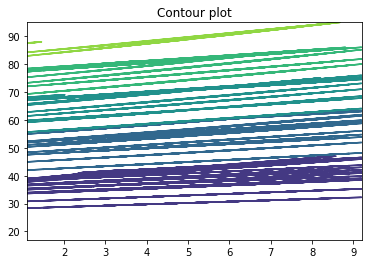

In [51]:
import pandas as pd
import numpy as np
def j(theta, x,y):
    return ((theta[0]*1+theta[1]*x)-y)**2

data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
x,y = np.meshgrid(X,y)
z = j(theta_val, x,y)
plt.contour(x,y,z)
plt.title("Contour plot")
plt.show()

5
[[1.         1.         1.         1.         1.        ]
 [0.78378378 0.89189189 0.54054054 0.         1.        ]]
Mean squared error 0.025175355756385808
ds (5, 1)
dsds (5, 1)


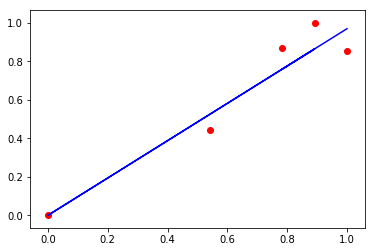

In [44]:
#Prediction
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

theta = gradient_descent(0.1, X_train,y_train, True,100)
X_test = norm(X_test.reshape(-1,1))
y_test = norm(y_test.reshape(-1,1))
temp = np.ones(len(X_test))
print(len(X_test))
X_test = np.vstack((temp.T, X_test.T))
print(X_test)
y_pred = np.dot(X_test.T, theta)
mse = (1/(len(X_test))) * np.square(y_pred-y_test).sum()
print("Mean squared error",mse)
x_val = X_test[1,:].reshape(-1,1)
print("ds",x_val.shape)
print("dsds",y_test.shape)
plt.scatter(x_val,y_test, c='red')
plt.plot(x_val, y_pred,c='blue')
plt.show()
theta_val = theta

[[ 0.75187245]
 [ 0.38341798]
 [ 0.2944807 ]
 [ 0.56129255]
 [-0.04856312]]
Mean squared error 0.003931248706690789
ds (5, 1)
dsds (5, 1)


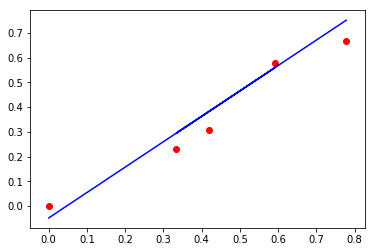

In [32]:
#Using inbuilt function

from sklearn.linear_model import LinearRegression
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X = norm(X.reshape(-1,1))
y = norm(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred = reg.predict(X_test.reshape(-1,1))
print(y_pred)
mse = (1/(len(X_test))) * np.square(y_pred-y_test.reshape(-1,1)).sum()
print("Mean squared error",mse)
x_val = X_test
print("ds",x_val.shape)
print("dsds",y_test.shape)
plt.scatter(x_val,y_test, c='red')
plt.plot(x_val, y_pred,c='blue')
plt.show()

In [33]:
#Part B
import pandas as pd
np.set_printoptions(suppress=True)
data = pd.read_csv('petrol_consumption.csv')
X = data.values[:,:4]
y = data.values[:,4]
X = norm(X)

y = norm(y.reshape(-1,1))
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
theta = gradient_descent(0.001, X_train, y_train,False)
temp = np.ones(len(X_test))
X_test = np.vstack((temp.T, X_test.T))
y_pred = np.dot(X_test.T, theta)
mse = (1/(len(X_test))) * np.square(y_pred-y_test).sum()
print("Mean squared error",mse)


Mean squared error 0.2125757721581587


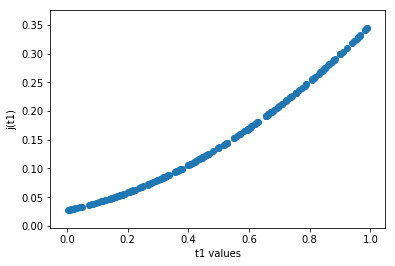

In [34]:
import warnings
warnings.filterwarnings("ignore")




t0 = 0.5
t1_values = np.random.rand(200,1)
np.sort(t1_values)
data = pd.read_csv('petrol_consumption.csv')
x = data['Petrol_tax'].values
y = data['Petrol_Consumption'].values
def cost(x,theta,y, norma=False):
    temp = np.ones(len(x))
    y = np.array(y)
    if norma:
        x = norm(x.reshape(-1,1))
        y = norm(y.reshape(-1,1))
    x = np.vstack((temp.reshape(1,len(temp)),x.T)).T
    theta = np.array(theta).reshape(-1,1)
    temp1 = np.square(np.dot(x,theta)-y).reshape(1,len(y))
    tempx = x[:,1]
    temp2 = np.dot(temp1,tempx)
    cost = temp2/(len(2*y))
    return cost
j=[]
for t1 in t1_values:
    j.append(cost(x,[t0,t1],y,True))
plt.scatter(t1_values,j)
plt.xlabel("t1 values")
plt.ylabel("j(t1)")
plt.show()